In [24]:
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from scipy import stats
import pandas as pd

In [25]:
nifti_file='/nfs/masi/saundam1/datasets/food_viewing_fmri/ds000157/sub-01/func/sub-01_task-passiveimageviewing_bold.nii.gz'
img = nib.load(nifti_file)
image_data = img.get_fdata()

hdr = img.header
zooms = hdr.get_zooms()

TR = zooms[3]
TR
tmax=30

In [26]:
t = np.arange(0, 24 + TR, TR)
n1 = 5.0          
t1 = 1.1          
n2 = 12.0      
t2 = 0.9         
a2 = 0.4      
t = np.arange(0, tmax + TR, TR)  

h1 = (t ** n1) * np.exp(-t / t1)
h2 = (t ** n2) * np.exp(-t / t2)

h = h1 / np.max(h1) - a2 * (h2 / np.max(h2))
h = h / np.max(h)  



In [27]:
tsv_file = '/nfs/masi/saundam1/datasets/food_viewing_fmri/ds000157/sub-01/func/events.tsv'
events_df = pd.read_csv(tsv_file, sep='\t')

print("\nEvent Timings:")
print(events_df.head())


nframes = image_data.shape[-1]
stimulus = np.zeros(nframes)



Event Timings:
   onset  duration trial_type
0    0.0     24.10       food
1   77.2     24.07       food
2  143.3     24.06       food
3  218.5     24.04       food
4  299.6     24.07       food


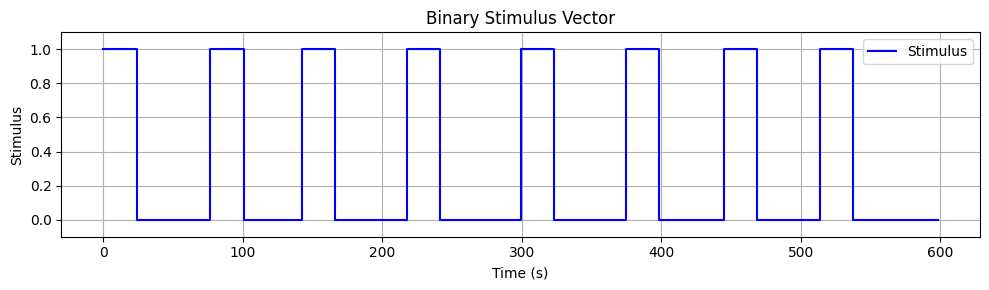

In [28]:
for index, row in events_df.iterrows():
    onset = row['onset'] 
    duration = row['duration']
    
    start_time = onset
    end_time = onset + duration
    
    start_idx = int(np.floor(start_time / TR))
    end_idx = int(np.floor(end_time / TR))
    
    start_idx = max(start_idx, 0)
    end_idx = min(end_idx, nframes)
    
    stimulus[start_idx:end_idx] = 1

plt.figure(figsize=(10, 3))
time_vector = np.arange(nframes) * TR
plt.step(time_vector, stimulus, where='post', color='blue', label='Stimulus')
plt.xlabel('Time (s)')
plt.ylabel('Stimulus')
plt.title('Binary Stimulus Vector')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
convolved = np.convolve(stimulus, h)[:nframes]
regressor = convolved / np.max(convolved)

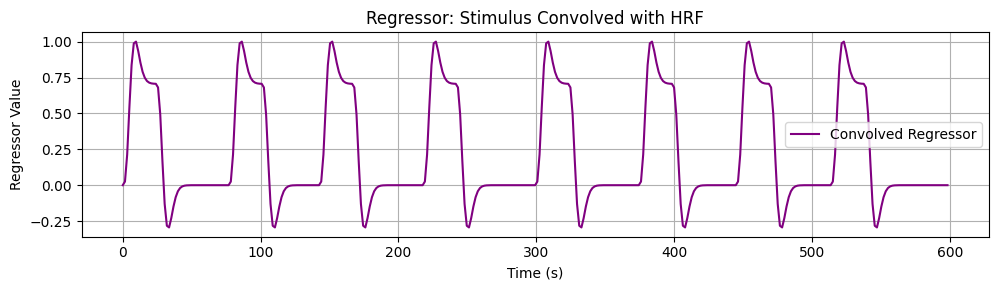

In [30]:
plt.figure(figsize=(10, 3))
plt.plot(time_vector, regressor, color='purple', label='Convolved Regressor')
plt.xlabel('Time (s)')
plt.ylabel('Regressor Value')
plt.title('Regressor: Stimulus Convolved with HRF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
